# Линейная регрессия

## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as stat

from scipy import stats
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm

from sklearn.decomposition import PCA

## Загрузка данных

In [2]:
df = pd.read_excel(r'Data_Labs.xlsx', sheet_name='ЛР 5')

In [3]:
df = df[['y1', 'x4', 'x8', 'x11', 'x12', 'x13']] # Выбрали нужные столбцы
df

,y1,x4,x8,x11,x12,x13
0,9.26,0.23,1.23,26006,167.69,47750
1,9.38,0.24,1.04,23955,186.10,50391
2,12.11,0.19,1.80,22589,220.45,43149
3,10.81,0.17,0.43,21220,169.30,41089
4,9.35,0.23,0.88,7394,39.53,14257
5,9.87,0.43,0.57,11586,40.41,22661
6,8.17,0.31,1.72,26609,102.96,52609
7,9.12,0.26,1.70,7801,37.02,14903
8,5.88,0.49,0.84,11587,45.74,25587
9,6.30,0.36,0.60,9475,40.07,16821


In [4]:
y = df['y1']
X = df[['x4', 'x8', 'x11', 'x12', 'x13']]

## Корреляционный анализ

In [5]:
correlation_matrix = df.corr()
correlation_matrix

,y1,x4,x8,x11,x12,x13
y1,1.000000,-0.800996,0.474116,0.653733,0.695996,0.664158
x4,-0.800996,1.000000,-0.368490,-0.511004,-0.575824,-0.522677
x8,0.474116,-0.368490,1.000000,0.469133,0.481303,0.468267
x11,0.653733,-0.511004,0.469133,1.000000,0.878272,0.970417
x12,0.695996,-0.575824,0.481303,0.878272,1.000000,0.913412
x13,0.664158,-0.522677,0.468267,0.970417,0.913412,1.000000


In [6]:
matrix = df.to_numpy().T
p_values = np.zeros_like(correlation_matrix)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if i != j:
            corr_coef, p_value = pearsonr(matrix[i], matrix[j])
            p_values[i, j] = round(p_value, 4)

# Вывод уровней значимости
print("Уровни значимости:")
print(p_values)

Уровни значимости:
[[0.     0.     0.0166 0.0004 0.0001 0.0003]
 [0.     0.     0.0699 0.009  0.0026 0.0073]
 [0.0166 0.0699 0.     0.018  0.0149 0.0182]
 [0.0004 0.009  0.018  0.     0.     0.    ]
 [0.0001 0.0026 0.0149 0.     0.     0.    ]
 [0.0003 0.0073 0.0182 0.     0.     0.    ]]


In [7]:
import pingouin as pg

In [8]:
P_correlation_matrix = df.pcorr().round(3)
P_correlation_matrix

,y1,x4,x8,x11,x12,x13
y1,1.000,-0.679,0.171,0.055,0.124,0.019
x4,-0.679,1.000,0.026,0.013,-0.111,0.041
x8,0.171,0.026,1.000,0.067,0.091,-0.028
x11,0.055,0.013,0.067,1.000,-0.106,0.861
x12,0.124,-0.111,0.091,-0.106,1.000,0.512
x13,0.019,0.041,-0.028,0.861,0.512,1.000


In [18]:
P1 = pg.partial_corr(data=df, x='x4', y='y1', covar=['x8', 'x11', 'x12', 'x13']).round(3)
P2 = pg.partial_corr(data=df, x='x8', y='y1', covar=['x4', 'x11', 'x12', 'x13']).round(3)
P3 = pg.partial_corr(data=df, x='x11', y='y1', covar=['x4', 'x8', 'x12', 'x13']).round(3)
P4 = pg.partial_corr(data=df, x='x12', y='y1', covar=['x4', 'x8', 'x11', 'x13']).round(3)
P5 = pg.partial_corr(data=df, x='x13', y='y1', covar=['x4', 'x8', 'x11', 'x12']).round(3)
P = pd.concat([P1, P2, P3, P4, P5])
P

,n,r,CI95%,p-val
pearson,25,-0.679,"[-0.86, -0.35]",0.001
pearson,25,0.171,"[-0.28, 0.56]",0.458
pearson,25,0.055,"[-0.39, 0.48]",0.813
pearson,25,0.124,"[-0.33, 0.53]",0.593
pearson,25,0.019,"[-0.42, 0.45]",0.936


## Регрессионный анализ

In [10]:
# Добавление константы к признакам
X = sm.add_constant(X)

# Построение множественной регрессии
model = sm.OLS(y, X)
results = model.fit()

# Вывод результатов
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     10.75
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           5.13e-05
Time:                        19:41:58   Log-Likelihood:                -36.977
No. Observations:                  25   AIC:                             85.95
Df Residuals:                      19   BIC:                             93.27
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1881      1.494      7.489      0.0

In [11]:
X

,const,x4,x8,x11,x12,x13
0,1.0,0.23,1.23,26006,167.69,47750
1,1.0,0.24,1.04,23955,186.10,50391
2,1.0,0.19,1.80,22589,220.45,43149
3,1.0,0.17,0.43,21220,169.30,41089
4,1.0,0.23,0.88,7394,39.53,14257
5,1.0,0.43,0.57,11586,40.41,22661
6,1.0,0.31,1.72,26609,102.96,52609
7,1.0,0.26,1.70,7801,37.02,14903
8,1.0,0.49,0.84,11587,45.74,25587
9,1.0,0.36,0.60,9475,40.07,16821


In [12]:
# Для теста
Xp = np.array([[1, 2, 1, 2, 2],
                [3, 1, 3, 1, 3]])
Xp = sm.add_constant(Xp)

# Предсказание
results.predict(Xp)

array([ -2.280109  , -31.57711391])

## Метод главных компонент

In [13]:
pca = PCA()

y = df['y1']
X = df[['x4', 'x8', 'x11', 'x12', 'x13']]

# Стандартизация
X_std = (X - X.mean()) / X.std()

# Применяем метод главных компонент
pca.fit(X_std)

# Получаем значения главных компонент
components = pca.transform(X_std)

# Создаем новый датафрейм с главными компонентами и результативным признаком
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca['y1'] = df['y1']

# Выводим результат
df_pca

,PC1,PC2,PC3,PC4,PC5,y1
0,1.754540,-0.127196,-0.286728,0.279703,-0.070797,9.26
1,1.635914,-0.531216,-0.308664,0.043148,0.107484,9.38
2,2.320328,1.087199,-0.404417,-0.290778,-0.116995,12.11
3,1.060952,-1.341083,-1.597703,0.012844,-0.055541,10.81
4,-0.806906,0.321619,-1.255498,0.062505,-0.031512,9.35
5,-1.475030,-0.888188,0.809759,0.091914,0.003909,9.87
6,1.593281,0.695124,0.894408,0.804992,0.185331,8.17
7,-0.325977,1.818658,-0.385760,0.101317,-0.012185,9.12
8,-1.439526,-0.540280,1.652167,0.017137,0.101103,5.88
9,-1.398127,-0.562410,-0.003205,0.017436,-0.080516,6.30


In [14]:
# Собственные значения ковариационной матрицы
L = pca.explained_variance_ratio_
L

array([0.70912158, 0.13843799, 0.12217533, 0.02521249, 0.00505262])

In [15]:
# Матрица перехода к главным компонентам
pca.components_

array([[-0.36545924,  0.33261831,  0.49998907,  0.49966374,  0.5061143 ],
       [-0.17427559,  0.89153657, -0.25815874, -0.1927087 , -0.26647323],
       [ 0.90837292,  0.30684829,  0.2022645 ,  0.06765478,  0.18765571],
       [-0.10390207,  0.0161827 ,  0.51063492, -0.82367406,  0.22305939],
       [-0.01142606,  0.01048119, -0.61782363, -0.17373363,  0.76672692]])

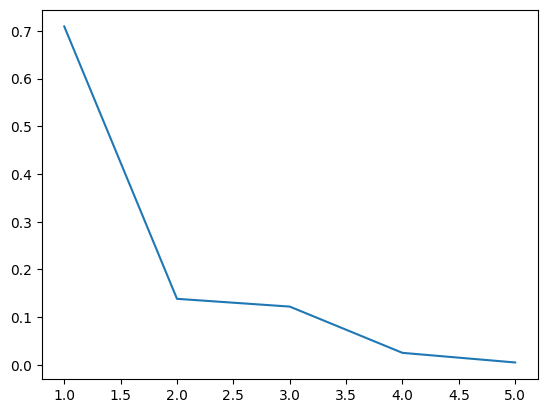

In [16]:
# Собственные числа
#plt.figure(figsize=(16, 9))
plt.plot(range(1, 6), L)

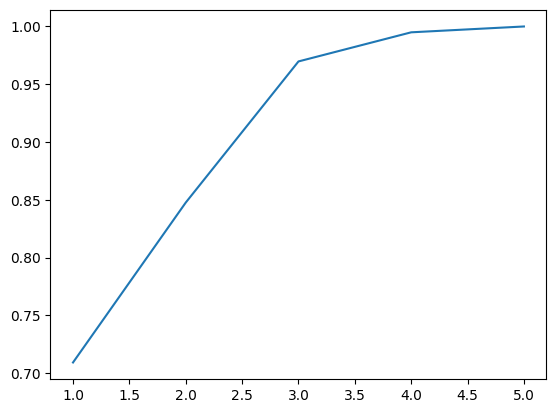

In [17]:
# Доля дисперсии
plt.plot(range(1, 6), L.cumsum())